In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

## Simple Linear Regression

In [30]:
# Load data
df = load_data('Boston')
xCol = 'lstat'
yCol = 'medv'

# Generate the matrices
y = df[yCol]
# X = pd.DataFrame({'intercept' : np.ones(df.shape[0]), xCol : df[xCol]})
design = MS(['lstat'])
design = design.fit(df)
X = design.transform(df) # or X = design.fit_transform(df)

# Do the linear regression
model = sm.OLS(y, X)
results = model.fit()

### Analyze regression result

In [31]:
# Analyze the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.08e-88
Time:                        18:05:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

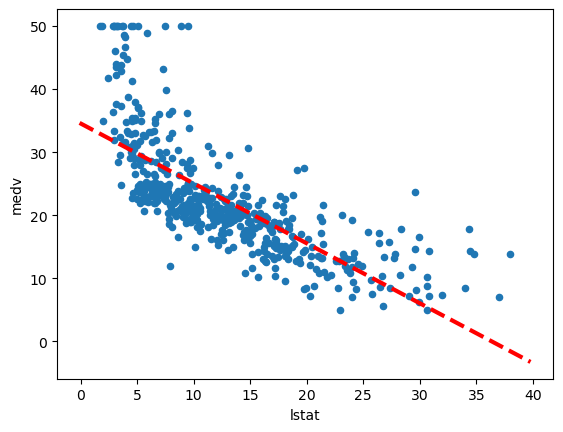

In [21]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
    
ax = df.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)  

# plot predicted value vs residual
# ax = subplots(figsize=(8,8))[1]
# ax.scatter(results.fittedvalues, results.resid)
# ax.set_xlabel('Fitted value')
# ax.set_ylabel('Residual')
# ax.axhline(0, c='k', ls='--')

In [22]:
# Do the prediction
newDf = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(newDf)
new_predictions = results.get_prediction(newX)

#new_predictions.summary_frame()
#new_predictions.predicted_mean
#new_predictions.conf_int(alpha=0.05)  #obs=True for prediction interval

## Multiple Linear Regression

In [23]:
# Load data
df = load_data('Boston')
xCol = df.columns.drop('medv')
yCol = 'medv'

In [47]:
X = MS(xCol).fit_transform(df)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

# VIF measures how much co-linearity of each predictor with other predictors
# vals = [VIF(X, i) for i in range(1, X.shape[1])]
# vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
# vif.sort_values(by = 'vif', ascending=False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          2.23e-133
Time:                        16:24:15   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(df) # use non-linear term lstat^2 as predictor 
model3 = sm.OLS(y, X)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     337.3
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          7.03e-120
Time:                        16:25:35   Log-Likelihood:                -1561.0
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                   17.7151      0.781     22.681      0.000      16.181      19.250
poly(lstat, degree=2)[0]  -179.2279      6.733    -26.620      0.000    -192.456    -166.000
poly(lstat, degree=2)[1]    72.9908      5.482     13.315      0.000      62.220      83.761
age                          0.0703      0.011      6.471      0.000       0.049       0.092
==============================================================================
Omnibus:                       81.499   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.528
Skew:                           0.918   Prob(JB):                     1.69e-34
Kurtosis:                       5.001   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
X = MS([poly('lstat', degree=2, raw=True)]).fit_transform(df) # use non-linear term lstat^2 as predictor 
model3 = sm.OLS(y, X)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          1.56e-112
Time:                        16:33:26   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
intercept                             42.8620      0.872     49.149      0.000      41.149      44.575
poly(lstat, degree=2, raw=True)[0]    -2.3328      0.124    -18.843      0.000      -2.576      -2.090
poly(lstat, degree=2, raw=True)[1]     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""